In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [56]:
def phi_pol(x, orden):
    pol = []
    for i in orden:
            pol.append(x**int(i))
    return np.array(pol).T


def modelo2(x, pre_params, params):
    m = 0
    for i in range(len(pre_params)):
        m += pre_params[i]*x**(i+1)
    m += params[0]*np.sin(params[1]*x + params[2])*np.exp(params[3]*x)
    return m


def log_like(params, x, y, pre_params, sigma_e):
    mod = modelo2(x, pre_params, params)
    arg = - 0.5*(len(y)*np.log(2*np.pi*sigma_e**2) + np.sum((y - mod)**2)/sigma_e**2)
    return arg


def MAP(x, y, orden, basis='pol', reg=0):
    """
    Retorna:
    t: estimador MAP
    """
    d = len(orden)
    if basis=='pol':
        p = phi_pol(x, orden=orden)
    t = np.linalg.inv(p.T@p + reg*np.ones((d, d)))@p.T@y
    return t


$Y = \Phi(X) \theta + \eta$

$\theta_{\text{MAP}} = (\Phi^{T}(X)\Phi(X))^{-1} \Phi^{T}(X) Y$

$\theta_{\text{MAP}} = (\Phi^{T}(X)\Phi(X) + \rho \mathbb{1})^{-1} \Phi^{T}(X) Y$

$\Phi(X) \in N \text{x} D$

$\rho = \frac{\sigma_{\epsilon}^{2}}{\sigma_{\theta}^{2}}$

Donde $\sigma_{\theta}^{2}$ es la varianza del prior y $\sigma_{\epsilon}^{2}$ es el error de medición. Suponiendo que $\sigma_{\epsilon}^{2} = 1$:

$\rho = \frac{1}{\sigma_{\theta}^{2}}$

Text(0.5,1,'conjunto de datos')

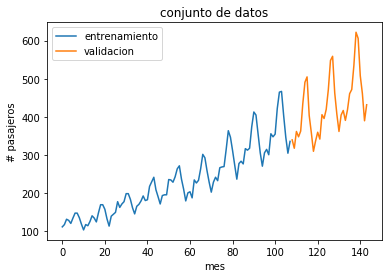

In [25]:
data = np.loadtxt('datosT2.txt')
n_train = int(12*9)
mes_train = data[:n_train, 0]
pax_train = data[:n_train, 1]
mes_val = data[n_train:, 0]
pax_val = data[n_train:, 1]
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='validacion')
plt.legend()
plt.xlabel('mes')
plt.ylabel('# pasajeros')
plt.title('conjunto de datos')

In [26]:
s_e = 1
rho = 1
s_t = 1

theta_map = MAP(mes_train, pax_train, orden=np.arange(1, 5, 1), basis='pol', reg=rho)
print('theta_map =', theta_map)

theta_map = [ 1.47722714e+01 -4.29954151e-01  5.46826476e-03 -2.28112509e-05]


In [27]:
p_train = phi_pol(mes_train, orden=np.arange(1, 5, 1))
p_val = phi_pol(mes_val, orden=np.arange(1, 5, 1))
y_train = p_train@theta_map
y_val = p_val@theta_map

Text(0.5,1,'conjunto de datos')

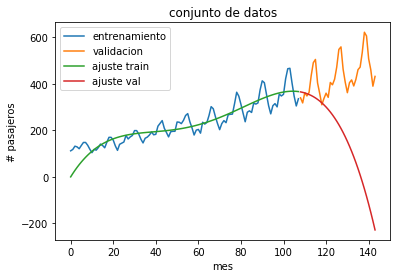

In [28]:
data = np.loadtxt('datosT2.txt')
n_train = int(12*9)
mes_train = data[:n_train, 0]
pax_train = data[:n_train, 1]
mes_val = data[n_train:, 0]
pax_val = data[n_train:, 1]
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='validacion')
plt.plot(mes_train, y_train, label='ajuste train')
plt.plot(mes_val, y_val, label='ajuste val')
plt.legend()
plt.xlabel('mes')
plt.ylabel('# pasajeros')
plt.title('conjunto de datos')

verosimilitud -94184.38015231535
[5.58475407 0.31415927 3.84872115 0.01      ]
      fun: -99837.84536553845
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  -1979.61523438,  104219.87890625,    1954.73535156,
       -726970.12011719])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 0
     njev: 104
   status: 2
  success: False
        x: array([5.58475407, 0.31415927, 3.84872115, 0.01      ])


/home/mauricio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in square
/home/mauricio/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/mauricio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/home/mauricio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in square
/home/mauricio/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/mauricio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


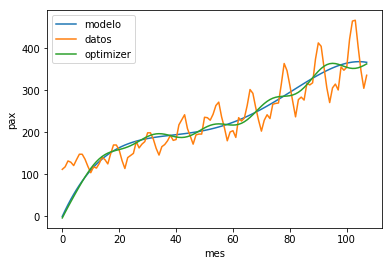

In [119]:
m2 = modelo2(x=mes_train, pre_params=theta_map, params=[1, 0, 0, 0])
L = log_like(params=[20, 2*3.14/15,2,-0.01], x=mes_train, y=pax_train, pre_params=theta_map, sigma_e=s_e)

print('verosimilitud', L)

plt.plot(mes_train, m2, label='modelo')
plt.plot(mes_train, pax_train, label='datos')
plt.xlabel('mes')
plt.ylabel('pax')

t1 = np.random.uniform(1, 10)
t2 = 2*np.pi/20
t3 = np.random.uniform(0, 2*np.pi)
x0 = np.array([t1, t2, t3, 0.01])

print(x0)
res = minimize(fun=log_like, x0=x0, args=(mes_train, pax_train, theta_map, s_e), method='BFGS')
print(res)
mod3 = modelo2(x=mes_train, pre_params=theta_map, params=res.x)
plt.plot(mes_train, mod3, label='optimizer')
plt.legend()

[3.87358873 0.31415927 0.4358695  0.01      ]
      fun: -91876.55769617081
 hess_inv: array([[ 0.99961617, -0.01718377,  0.00130449, -0.00952853],
       [-0.01718377,  0.2459319 ,  0.06483017, -0.42663432],
       [ 0.00130449,  0.06483017,  0.99828095,  0.03236142],
       [-0.00952853, -0.42663432,  0.03236142,  0.76345719]])
      jac: array([ -28.89941406,  164.05371094,  713.66601562, -722.43261719])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 152
      nit: 1
     njev: 24
   status: 2
  success: False
        x: array([ 3.85580275, -0.59413624,  0.44901886, -0.43114626])


In [66]:
def model(a, x):
    return a[0]**2*x**2 + a[1]**2*np.sin(x)

X = np.arange(-1, 1, 100)

res = minimize(fun=model, x0=np.array([5, 5]), args=(X), method='BFGS')

print(res)

      fun: array([-18021650.68519821])
 hess_inv: array([[ 0.66520185, -0.14677015],
       [-0.14677015, -0.46379434]])
      jac: array([-11897.5, -13408. ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 204
      nit: 2
     njev: 48
   status: 2
  success: False
        x: array([-5948.75839565,  7966.89665992])
